In [1]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.2/376.0 MB 3.0 MB/s eta 0:02:07
   ---------------------------------------- 0.6/376.0 MB 4.3 MB/s eta 0:01:27
   ---------------------------------------- 1.0/376.0 MB 5.9 MB/s eta 0:01:04
   ---------------------------------------- 1.4/376.0 MB 6.4 MB/s eta 0:00:59
   ---------------------------------------- 1.9/376.0 MB 6.6 MB/s eta 0:00:57
   ---------------------------------------- 2.3/376.0 MB 7.4 MB/s eta 0:00:51
   ---------------------------------------- 2.8/376.0 MB 7.7 MB/s eta 0:00:49
   ---------------------------------------- 2.9/376.0 MB 7.7 MB/s eta 0:00:49
   -


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import tensorflow as tf

from tensorflow.keras import layers, models, optimizers, callbacks

from tensorflow.keras.models import Sequential, load_model

from tensorflow.keras.applications import EfficientNetV2B0

from tensorflow.keras.applications.efficientnet import preprocess_input

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report

import gradio as gr

from PIL import Image

ModuleNotFoundError: No module named 'matplotlib'

In [4]:
pip install matplotlib seaborn scikit-learn gradio pillow --user


     ---------------------------------------- 0.0/108.7 kB ? eta -:--:--
     -------------------------------------- 108.7/108.7 kB 6.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     -------------------------------------- 60.8/60.8 kB 814.7 kB/s eta 0:00:00
     ---------------------------------------- 0.0/43.0 kB ? eta -:--:--
     ---------------------------------------- 43.0/43.0 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/68.0 kB ? eta -:--:--
     ---------------------------------------- 68.0/68.0 kB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 0.0/57.7 kB ? eta -:--:--
     ---------------------------------------- 57.7/57.7 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
    --------------------------------------- 0.2/8.1 MB 5.9 MB/s eta 0:00:02
   - ----------------


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import tensorflow as tf

from tensorflow.keras import layers, models, optimizers, callbacks

from tensorflow.keras.models import Sequential, load_model

from tensorflow.keras.applications import EfficientNetV2B0

from tensorflow.keras.applications.efficientnet import preprocess_input

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report

import gradio as gr

from PIL import Image

C:\Users\ARJUN\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
testpath= r'D:\aicte intership\modified-dataset\test'
trainpath= r'D:\aicte intership\modified-dataset\train'
validpath = r'D:\aicte intership\modified-dataset\val'
datatrain= tf.keras.utils.image_dataset_from_directory(trainpath,shuffle = True, image_size = (128,128), batch_size = 32, validation_split= False)
datatest=tf.keras.utils.image_dataset_from_directory(testpath,shuffle = False, image_size = (128,128), batch_size = 32, validation_split= False)
datavalid = tf.keras.utils.image_dataset_from_directory(validpath,shuffle = True, image_size = (128,128), batch_size = 32, validation_split= False)



Found 2400 files belonging to 10 classes.
Found 300 files belonging to 10 classes.
Found 300 files belonging to 10 classes.


In [7]:
print(len(datatrain.class_names))
class_names = datatrain.class_names
print(class_names)

10
['Battery', 'Keyboard', 'Microwave', 'Mobile', 'Mouse', 'PCB', 'Player', 'Printer', 'Television', 'Washing Machine']


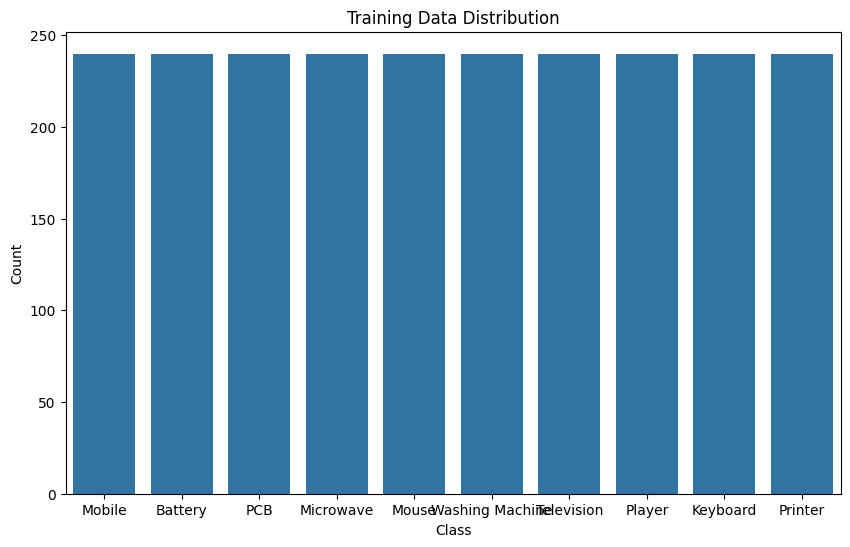

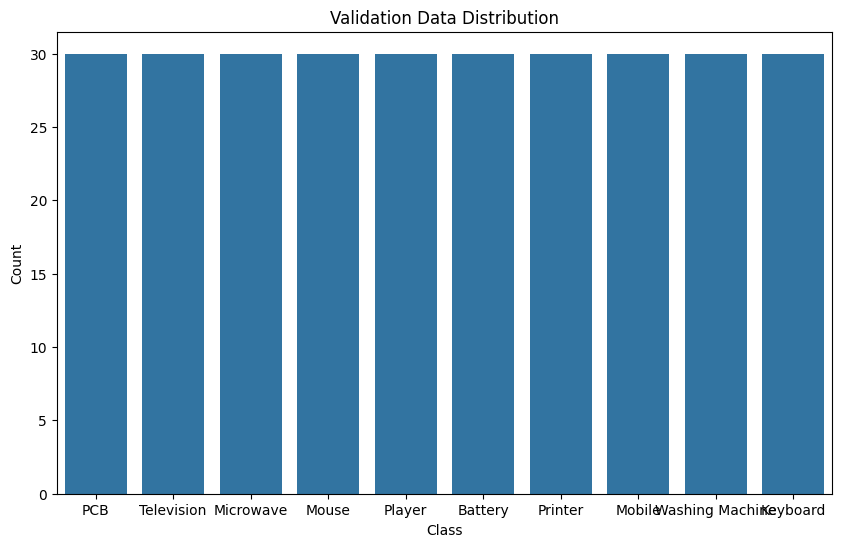

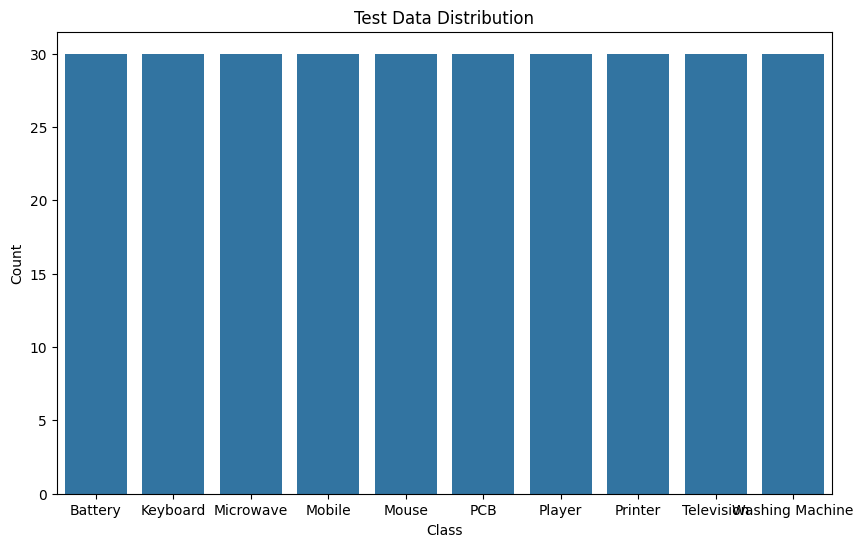

In [8]:
def plot_class_distribution(dataset, title="Class Distribution"):
  class_counts = {}
  for images, labels in dataset:
    for label in labels.numpy():
        class_name = dataset.class_names[label]
        class_counts[class_name] = class_counts.get(class_name, 0) + 1
  class_names = list(class_counts.keys())  # List of class names
  counts = list(class_counts.values())
  plt.figure(figsize=(10, 6))
  sns.barplot(x=class_names, y=counts)
  plt.xlabel("Class")
  plt.ylabel("Count")
  plt.title(title)
  plt.show()
plot_class_distribution(datatrain, "Training Data Distribution")
plot_class_distribution(datavalid, "Validation Data Distribution")
plot_class_distribution(datatest, "Test Data Distribution")


In [9]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

In [10]:
base_model = tf.keras.applications.EfficientNetV2B0(
    input_shape=(128, 128, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = True
for layer in base_model.layers[:100]:
    layer.trainable = False

24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(128, 128, 3)),
    data_augmentation,
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['Accuracy'])

In [12]:
# Define an EarlyStopping callback to stop training when validation loss stops improving
early = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',            # Metric to monitor (validation loss here)
    patience=3,                   # Number of epochs to wait after last improvement before stopping
    restore_best_weights=True     # After stopping, restore the model weights from the epoch with the best val_loss
)

In [13]:
# Set the number of epochs to train the model
epochs = 15

# Train the model on the training dataset 'datatrain'
history = model.fit(
    datatrain,                      # Training data generator or dataset
    validation_data=datavalid,      # Validation data generator or dataset
    epochs=epochs,                  # Number of training epochs
    batch_size=100,                 # Number of samples per gradient update
    callbacks=[early]               # List of callbacks to apply during training (e.g., early stopping)
)

Epoch 1/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 85s 471ms/step - Accuracy: 0.2357 - loss: 2.1392 - val_Accuracy: 0.7833 - val_loss: 1.1480
Epoch 2/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 418ms/step - Accuracy: 0.7543 - loss: 1.0100 - val_Accuracy: 0.8867 - val_loss: 0.5358
Epoch 3/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 411ms/step - Accuracy: 0.8503 - loss: 0.5415 - val_Accuracy: 0.9133 - val_loss: 0.3281
Epoch 4/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 413ms/step - Accuracy: 0.8946 - loss: 0.3469 - val_Accuracy: 0.9400 - val_loss: 0.2524
Epoch 5/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 410ms/step - Accuracy: 0.9227 - loss: 0.2710 - val_Accuracy: 0.9467 - val_loss: 0.2143
Epoch 6/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 32s 422ms/step - Accuracy: 0.9316 - loss: 0.2217 - val_Accuracy: 0.9533 - val_loss: 0.1886
Epoch 7/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 415ms/step - Accuracy: 0.9505 - loss: 0.1635 - val_Accuracy: 0.9533 - val_loss: 0.1837
Epoch 8/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 32s 422ms/step - Accuracy: 0.9586 - loss: 0.1475 - val_Accu

In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, 4, 4, 1280)     │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,269,040 (62.06 MB)

 Trainable params: 5,168,458 (19.72 MB)

 Non-trainable params: 763,664 (2.91 MB)

 Optimizer params: 10,336,918 (39.43 MB)

In [15]:
base_model.summary()

Model: "efficientnetv2-b0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 128, 128,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 128, 128,  │          0 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 64, 64,    │        864 │ normalization[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 64, 64,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 64, 64,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 64, 64,    │      4,608 │ stem_activation[… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 64, 64,    │         64 │ block1a_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, 64, 64,    │          0 │ block1a_project_… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, 32, 32,    │      9,216 │ block1a_project_… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, 32, 32,    │        256 │ block2a_expand_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, 32, 32,    │          0 │ block2a_expand_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_co… │ (None, 32, 32,    │      2,048 │ block2a_expand_a… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_bn  │ (None, 32, 32,    │        128 │ block2a_project_… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_conv │ (None, 32, 32,    │     36,864 │ block2a_project_… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_bn   │ (None, 32, 32,    │        512 │ block2b_expand_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_act… │ (None, 32, 32,    │          0 │ block2b_expand_b

 Total params: 5,919,312 (22.58 MB)

 Trainable params: 5,155,648 (19.67 MB)

 Non-trainable params: 763,664 (2.91 MB)

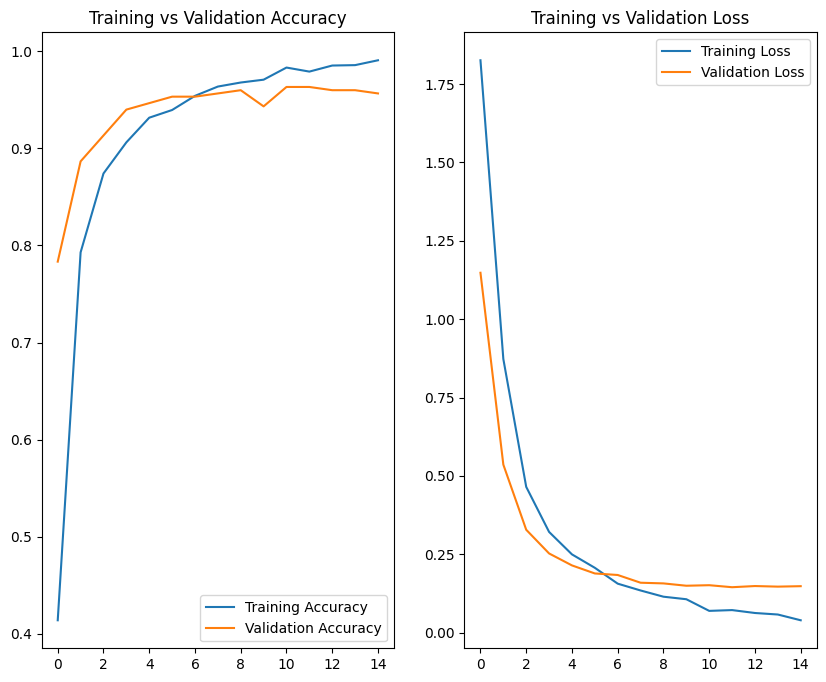

In [16]:
acc = history.history['Accuracy']          
val_acc = history.history['val_Accuracy']   
loss = history.history['loss']              
val_loss = history.history['val_loss']
epochs_range = range(len(acc))              # X-axis range based on number of epochs

plt.figure(figsize=(10, 8))                 # Set overall figure size

plt.subplot(1, 2, 1)                        # 1 row, 2 columns, position 1
plt.plot(epochs_range, acc, label='Training Accuracy')       # Plot training accuracy
plt.plot(epochs_range, val_acc, label='Validation Accuracy') # Plot validation accuracy
plt.legend(loc='lower right')              # Show legend at lower right
plt.title('Training vs Validation Accuracy') # Set title for accuracy plot

plt.subplot(1, 2, 2)                        # 1 row, 2 columns, position 2
plt.plot(epochs_range, loss, label='Training Loss')          # Plot training loss
plt.plot(epochs_range, val_loss, label='Validation Loss')    # Plot validation loss
plt.legend(loc='upper right')              # Show legend at upper right
plt.title('Training vs Validation Loss')    # Set title for loss plot

plt.show()           

In [17]:
loss, accuracy = model.evaluate(datatest)
print(f'Test accuracy is{accuracy:.4f}, Test loss is {loss:.4f}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 186ms/step - Accuracy: 0.9491 - loss: 0.1600
Test accuracy is0.9533, Test loss is 0.1343


In [18]:
y_true = np.concatenate([y.numpy() for x, y in datatest], axis=0)  # Ground truth labels

# Get predictions as probabilities and then predicted classes
y_pred_probs = model.predict(datatest)

# Class with highest probability
y_pred = np.argmax(y_pred_probs, axis=1)                           

# Print confusion matrix and classification report
print(confusion_matrix(y_true, y_pred))                            
print(classification_report(y_true, y_pred)) 

10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 611ms/step
[[27  0  0  0  0  1  2  0  0  0]
 [ 0 29  1  0  0  0  0  0  0  0]
 [ 0  0 30  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 28  2  0  0  0]
 [ 0  0  1  0  0  0 27  2  0  0]
 [ 0  0  0  0  0  0  0 30  0  0]
 [ 0  0  2  1  0  0  1  0 26  0]
 [ 0  0  0  0  0  0  0  0  0 30]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        30
           1       1.00      0.97      0.98        30
           2       0.88      1.00      0.94        30
           3       0.97      1.00      0.98        30
           4       1.00      0.97      0.98        30
           5       0.97      0.93      0.95        30
           6       0.84      0.90      0.87        30
           7       0.91      1.00      0.95        30
           8       1.00      0.87      0.93        30
           9       1.00      1.00      1.00        30

    accuracy                    

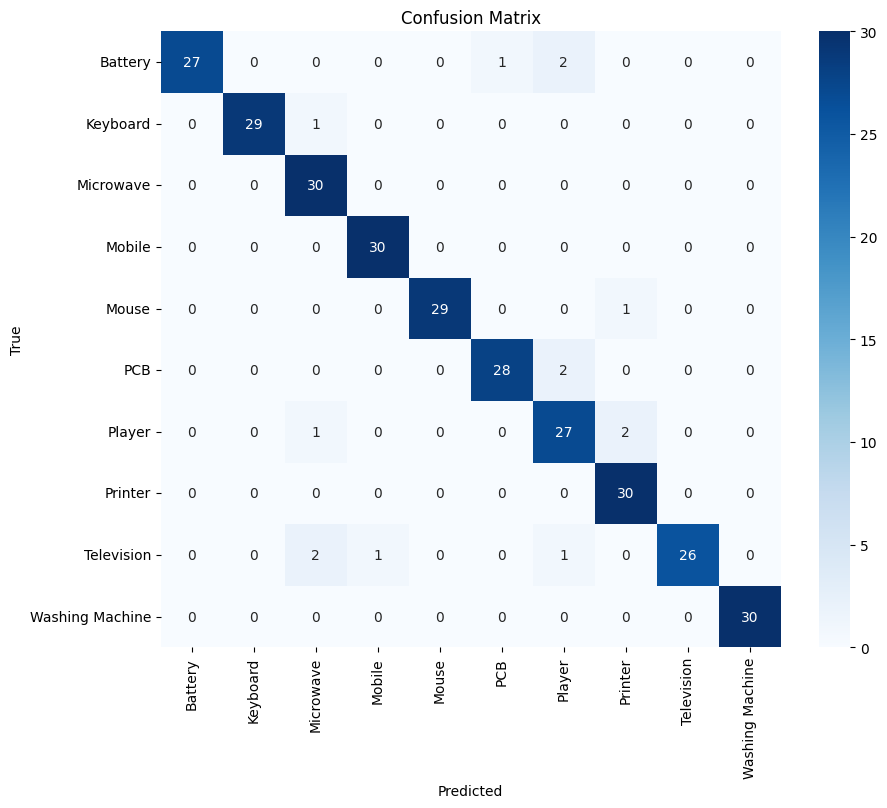

In [19]:
cm = confusion_matrix(y_true, y_pred)                                     

plt.figure(figsize=(10, 8))                                               # Set figure size
sns.heatmap(cm, annot=True, fmt='d', 
            xticklabels=class_names, 
            yticklabels=class_names, 
            cmap='Blues')                                                 # Create heatmap with class labels

plt.xlabel('Predicted')                                                   # Label for x-axis
plt.ylabel('True')                                                        # Label for y-axis
plt.title('Confusion Matrix')                                             # Title for the plot
plt.show()           

In [3]:
import tensorflow as tf
print(tf.__version__)

2.19.0
